In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 获取数据

In [3]:
dataset = load_linnerud()

In [4]:
dataset.data.shape, dataset.target.shape

((20, 3), (20, 3))

In [5]:
dataset.feature_names, dataset.target_names

(['Chins', 'Situps', 'Jumps'], ['Weight', 'Waist', 'Pulse'])

In [6]:
dataset.data[:10]

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.]])

In [7]:
# 线性多输出数据集
dataset.target[:10]

array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.]])

In [9]:
dataset.data[0]

array([  5., 162.,  60.])

In [8]:
dataset.data[:, 0]

array([ 5.,  2., 12., 12., 13.,  4.,  8.,  6., 15., 17., 17., 13., 14.,
        1.,  6., 12.,  4., 11., 15.,  2.])

<AxesSubplot: ylabel='Density'>

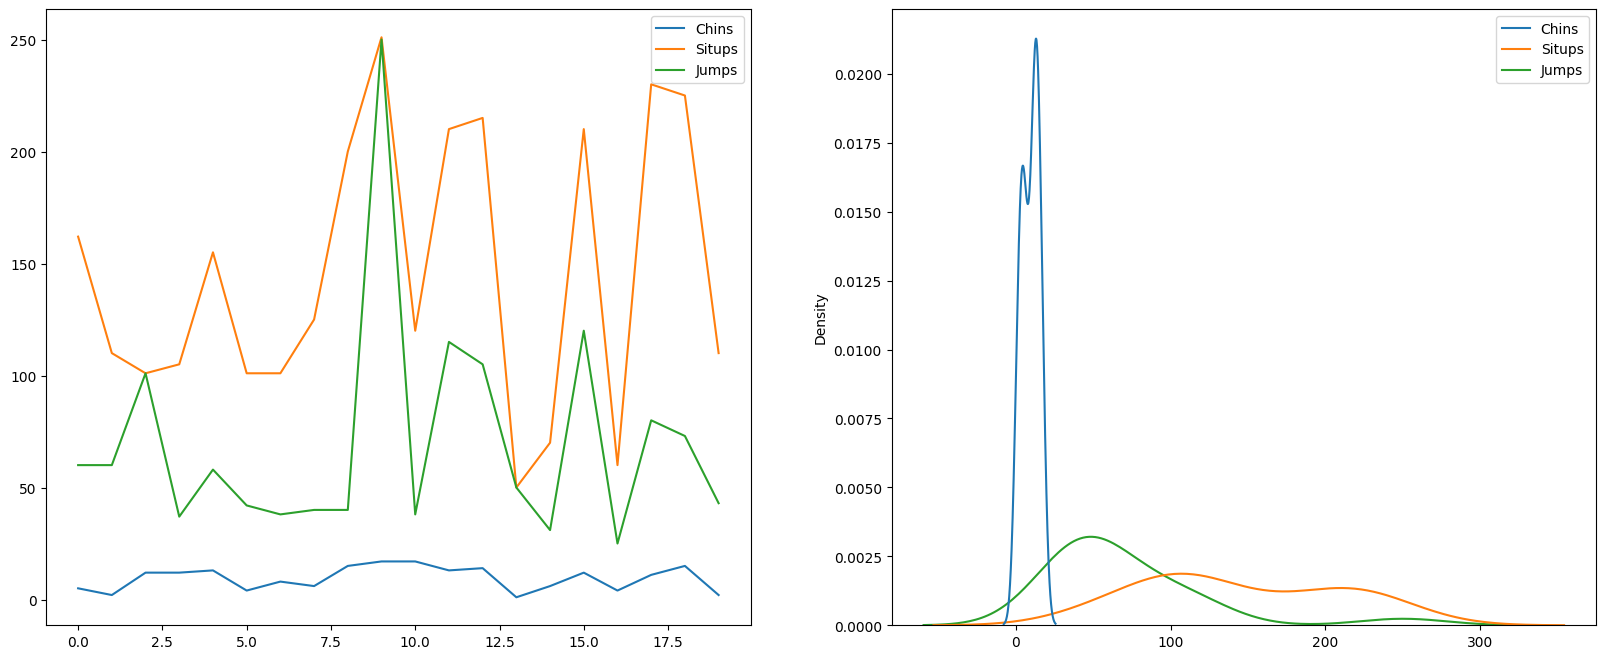

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=100)
axes[0].plot(dataset.data)
axes[0].legend(dataset.feature_names)
sns.kdeplot({
        "Chins": dataset.data[:, 0],
        "Situps": dataset.data[:, 1],
        "Jumps": dataset.data[:, 2],
    }, ax=axes[1])

<AxesSubplot: ylabel='Density'>

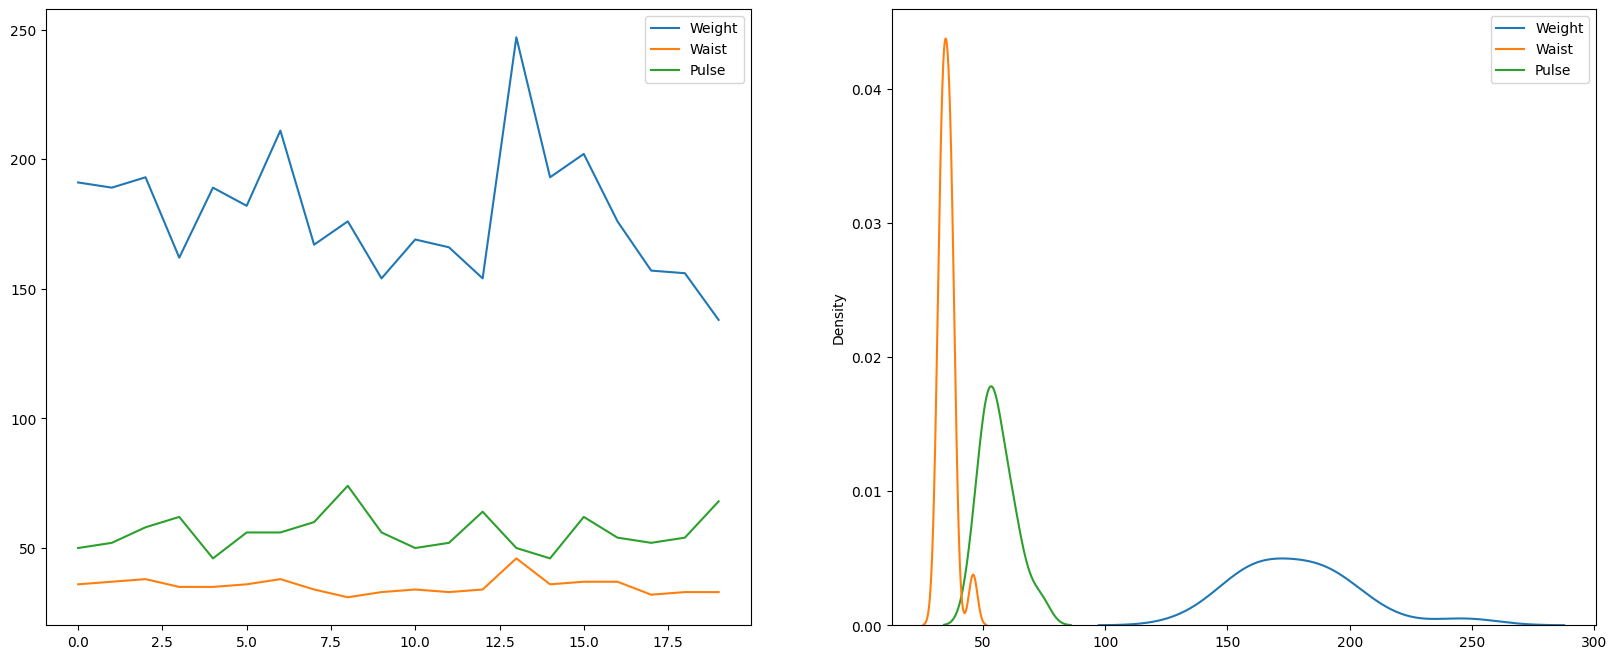

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), dpi=100)
axes[0].plot(dataset.target)
axes[0].legend(dataset.target_names)
sns.kdeplot({
        "Weight": dataset.target[:, 0],
        "Waist": dataset.target[:, 1],
        "Pulse": dataset.target[:, 2],
    }, ax=axes[1])

# 划分数据集

In [17]:
x_train, x_val, y_train, y_val = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=0)

In [18]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((16, 3), (4, 3), (16, 3), (4, 3))

# 特征值标准化

In [19]:
scaler = StandardScaler()

In [20]:
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [21]:
x_train[0], x_train_scaled[0]

(array([ 17., 120.,  38.]), array([ 1.54712646, -0.34648333, -0.6646972 ]))

# 训练

In [22]:
estimator = LinearRegression()

In [23]:
estimator.fit(x_train_scaled, y_train)

LinearRegression()

In [24]:
# 得分很低,因为不是分类,是回归
estimator.score(x_val_scaled, y_val)

-1.2067854090560195

# 误差评估

In [26]:
y_predict_scaled = estimator.predict(x_val_scaled)
y_predict_scaled[:10]

array([[153.63090772,  31.11656185,  55.68557217],
       [203.26736591,  38.83382692,  53.59663288],
       [200.86145905,  38.31456627,  53.36415231],
       [153.90911951,  31.07098739,  55.02924621]])

In [27]:
mean_squared_error(y_val, y_predict_scaled)

438.61568364852707